In [ ]:
pip install gradio

     |████████████████████████████████| 2.0 MB 5.0 MB/s 
     |████████████████████████████████| 1.9 MB 39.5 MB/s 
     |████████████████████████████████| 206 kB 22.5 MB/s 
     |████████████████████████████████| 3.5 MB 54.2 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 961 kB 70.7 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=7362d735589c400109847636b51ce550232cc54f158d655be9de5c5691be4bd7
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=f0409bfb937c53c27c7a560a4d9214924901920d32c6820e176f0bd0912f2a73
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [ ]:
import gradio as gr

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)


228827136/228813984 [==============================] - 2s 0us/step


/root/.keras/datasets/flower_photos/roses/3624546109_8eb98f0cdb.jpg


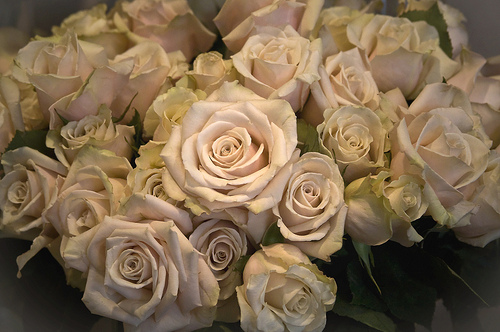

In [ ]:
roses = list(data_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


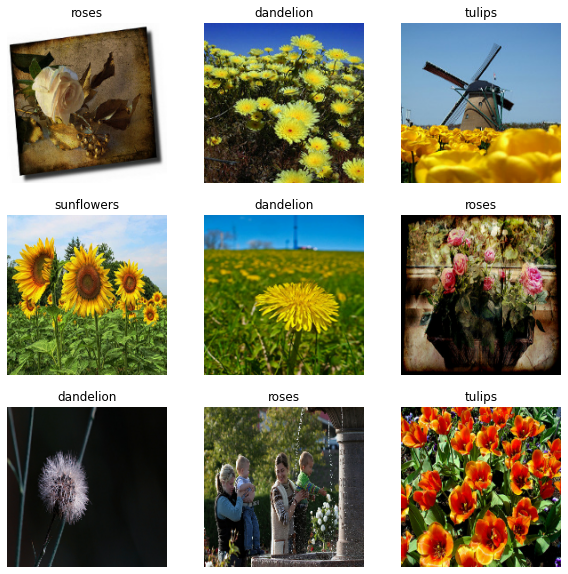

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 97s 1s/step - loss: 1.3154 - accuracy: 0.4421 - val_loss: 1.0971 - val_accuracy: 0.5477
Epoch 2/10
92/92 [==============================] - 96s 1s/step - loss: 1.0131 - accuracy: 0.6008 - val_loss: 1.0184 - val_accuracy: 0.5954
Epoch 3/10
92/92 [==============================] - 96s 1s/step - loss: 0.8534 - accuracy: 0.6785 - val_loss: 0.8915 - val_accuracy: 0.6431
Epoch 4/10
92/92 [==============================] - 96s 1s/step - loss: 0.6776 - accuracy: 0.7377 - val_loss: 0.8566 - val_accuracy: 0.6744
Epoch 5/10
92/92 [==============================] - 96s 1s/step - loss: 0.4906 - accuracy: 0.8236 - val_loss: 0.9395 - val_accuracy: 0.6376
Epoch 6/10
92/92 [==============================] - 96s 1s/step - loss: 0.2815 - accuracy: 0.9016 - val_loss: 1.1187 - val_accuracy: 0.6335
Epoch 7/10
92/92 [==============================] - 97s 1s/step - loss: 0.1793 - accuracy: 0.9452 - val_loss: 1.1423 - val_accuracy: 0.6812
Epoch 8/10
92/92 [=============

In [ ]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}


In [ ]:

image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://43557.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app
